# Intro 

In this notebook I try to pass to the gvgai gym a level, a playtrace and a seed, and see if I can get a nice replay visualization.

In [1]:
import gym
import gym_gvgai

In [2]:
gym_gvgai.__file__

'/Users/migd/Projects/GVGAI_GYM-master/gym_gvgai/__init__.py'

for now, I'll manually copy the level that I find interesting. If this works, I could implement a whole function and so on.

In [3]:
import matplotlib.pyplot as plt
from IPython import display

In [4]:
def show_state(env, step=0, score=""):
    plt.figure()
    plt.clf()
    plt.imshow(env.render(mode="rgb_array"))
    
    plt.title(f"step: {step}, score: {score}")
    plt.axis("off")
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.close()

In [5]:
from gym.envs.registration import registry, register, make, spec

In [6]:
from shutil import copyfile

In [11]:
def replay(playtrace_path, level_path):
    # Register the level using gym with the appropiate seed
    with open(playtrace_path) as fp:
        playtrace = fp.readlines()
    seed, _, _, steps = playtrace.pop(0).split(" ")
    print(seed, steps)
    
    ## Registering the level
    copyfile(
        level_path,
        "/Users/migd/Projects/GVGAI_GYM-master/gym_gvgai/envs/games/zelda_v1/zelda_lvl4.txt"
    )
    env_id = f'gvgai-zelda-lvl4-v1'
    if env_id in gym.envs.registry.env_specs:
        del gym.envs.registry.env_specs[env_id]

    register(
        id=env_id,
        entry_point='gym_gvgai.envs.gvgai_env:GVGAI_Env',
        kwargs={'game': "zelda", 'level': 4, 'version': 1, "random_seed": seed},
        max_episode_steps=2000
        #nondeterministic=nondeterministic,
        #Play with different setups here
    )
    
    ## building the environment
    env = gym.make(env_id)
    env.reset()

    # play said playtrace and show the video.
    for i, line in enumerate(playtrace):
        show_state(env, step=i)
        action = line.replace("\n", "")
        action_id = env.unwrapped.get_action_meanings().index(action)
        env.step(action_id)

In [12]:
playtrace_path = "/Users/migd/Projects/ITAE_First_Test_paper/code/2020_02_26_experiments/zelda/zelda_experiments/playtraces/1583778779_178242_olets_10_gens_50_iter_100_init_40_roll_17_seed_playtrace_seed_94.txt"

In [13]:
level_path = "/Users/migd/Projects/ITAE_First_Test_paper/code/2020_02_26_experiments/zelda/zelda_experiments/levels/1583778779_178242_olets_10_gens_50_iter_100_init_40_roll_17_seed_level.txt"

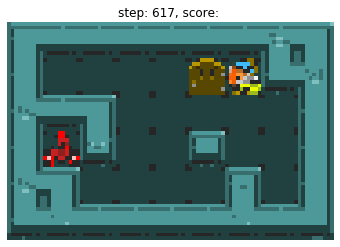

In [15]:
replay(playtrace_path, level_path)